In [1]:
import sys
import pandas as pd
import importlib
# Lägg till 'src' i sökvägen så att vi kan importera vår egen modul
sys.path.append('./src')
import health_analyzer
importlib.reload(health_analyzer)
from health_analyzer import HealthDataAnalyzer
from IPython.display import Markdown as md, display

In [2]:
analyzer = HealthDataAnalyzer('data/health_study_dataset.csv')

In [3]:
# Data Cleaning
display(md("## 1. Data Rengöring och Förberedelse"))
display(md("Enligt god praxis valideras datan även om inga problem förväntas."))

rengoring_resultat = analyzer.data_cleaning()
print(rengoring_resultat)

## 1. Data Rengöring och Förberedelse

Enligt god praxis valideras datan även om inga problem förväntas.

Rengöringsstatus:
- Saknade värden hittades: 0
- Dubbla rader hittades: 0
- Datan är nu redo för analys.


In [4]:
# Dataförberedelse för Modellering (Pipeline)
display(md("## Dataförberedelse för Modellering (Pipeline)"))
preprocessing_msg = analyzer.data_preprocessing()
display(md(f"""
Datan har förberetts genom att köra metoden `data_preprocessing` i klassen.
Detta inkluderade:
1.  **One-Hot Encoding** av kategoriska variabler (`sex`, `smoker`).
2.  **Standardisering (Scaling)** av alla numeriska variabler (`age`, `weight`, etc.) med `StandardScaler`. Standardisering säkerställer att alla funktioner bidrar lika till modellen.

*Resultat:* {preprocessing_msg}
"""))

## Dataförberedelse för Modellering (Pipeline)


Datan har förberetts genom att köra metoden `data_preprocessing` i klassen.
Detta inkluderade:
1.  **One-Hot Encoding** av kategoriska variabler (`sex`, `smoker`).
2.  **Standardisering (Scaling)** av alla numeriska variabler (`age`, `weight`, etc.) med `StandardScaler`. Standardisering säkerställer att alla funktioner bidrar lika till modellen.

*Resultat:* Data standardiserad och kodad (One-Hot Encoded) för modellering i self.df_processed.


In [5]:
display(md("## 2. Beskrivande Analys"))

kolumner_att_analysera = ['age', 'weight', 'height', 'systolic_bp', 'cholesterol']
statistik_df = analyzer.get_descriptive_stats(kolumner_att_analysera)

display(statistik_df.style.set_caption("Beskrivande Statistik för Nyckelvariabler"))

## 2. Beskrivande Analys

,Medel,Median,Min,Max
age,49.426250,50.000000,18.000000,90.000000
weight,73.413000,73.200000,33.700000,114.400000
height,171.849250,171.350000,144.400000,200.400000
systolic_bp,149.178625,149.400000,106.800000,185.900000
cholesterol,4.929150,4.970000,2.500000,7.880000


## 3. Grafer (Visualization)

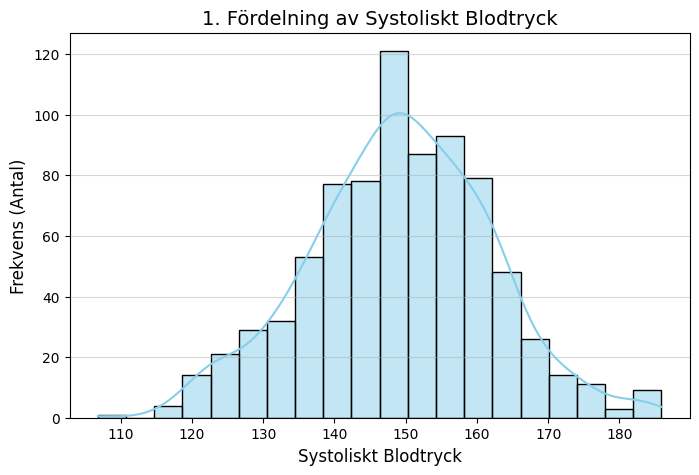

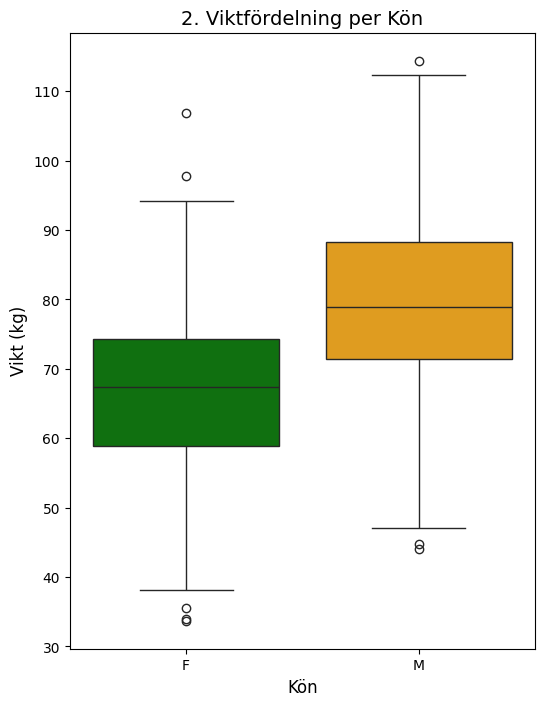

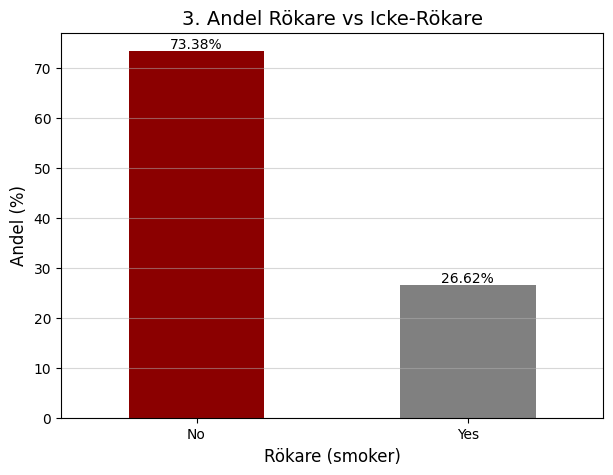

Alla 3 grafer har skapats och sparats i PNG-filer samt visats i notebooken.

*(Graffilerna har sparats som PNG-filer)*

In [6]:
display(md("## 3. Grafer (Visualization)"))

graf_meddelande = analyzer.generate_plots()
display(md(graf_meddelande))
display(md("*(Graffilerna har sparats som PNG-filer)*"))

## 2. Utökad Analys: Blodtryck vs. Ålder och Sjukdom

Ett nytt spridningsdiagram skapas för att visualisera sambandet mellan ålder och systoliskt blodtryck, färgkodat efter sjukdomsstatus. Detta ger en djupare förståelse för hur dessa tre variabler interagerar. **(G-krav)**

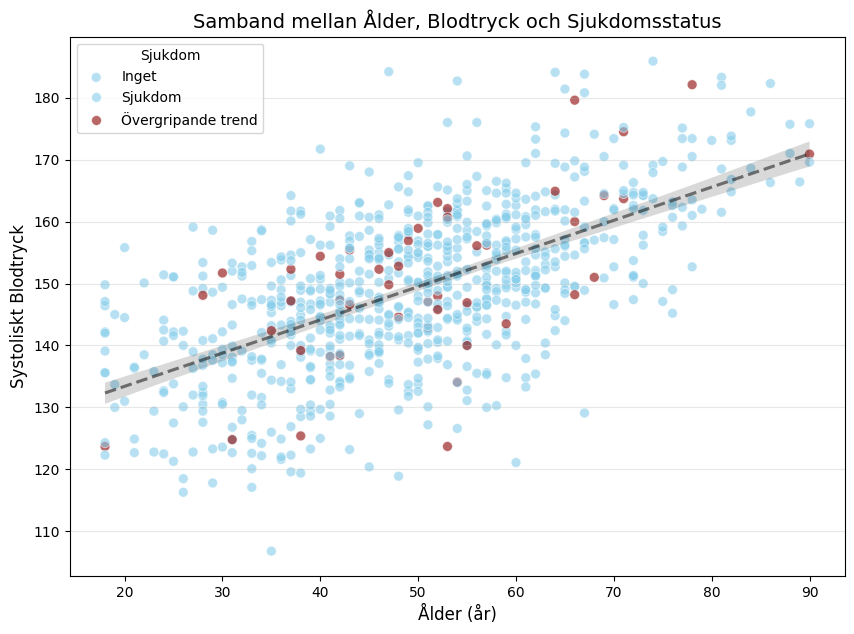

Grafer har skapats och sparats i katalogen 'plots/'.

In [ ]:
display(md("## 2. Utökad Analys: Blodtryck vs. Ålder och Sjukdom"))
display(md("Ett nytt spridningsdiagram skapas för att visualisera sambandet mellan ålder och systoliskt blodtryck, färgkodat efter sjukdomsstatus. Detta ger en djupare förståelse för hur dessa tre variabler interagerar."))

extended_plot_msg = analyzer.plot_bp_vs_age_disease()
display(md(extended_plot_msg))

In [8]:
# Simulering

display(md("## 4. Simulering av Sjukdomsandel"))

sim_resultat = analyzer.run_simulation(sample_size=1000)

display(md(f"""
Baserat på datasetet:
* Verklig andel med sjukdomen: **{sim_resultat['verklig_andel']:.2f}%**
* Simulerad andel (N={sim_resultat['sample_size']}): **{sim_resultat['simulerad_andel']:.2f}%**
* Skillnad: {abs(sim_resultat['verklig_andel'] - sim_resultat['simulerad_andel']):.2f} procentenheter.

**Slutsats:** Den simulerade andelen är mycket nära den verkliga andelen i datasetet, vilket bekräftar att vår simulering är baserad på en korrekt sannolikhetsfördelning.
"""))

## 4. Simulering av Sjukdomsandel


Baserat på datasetet:
* Verklig andel med sjukdomen: **5.88%**
* Simulerad andel (N=1000): **5.60%**
* Skillnad: 0.27 procentenheter.

**Slutsats:** Den simulerade andelen är mycket nära den verkliga andelen i datasetet, vilket bekräftar att vår simulering är baserad på en korrekt sannolikhetsfördelning.


In [9]:
# Konfidensintervall
display(md("## 5. Konfidensintervall för Medelvärdet av Systoliskt Blodtryck"))

ci_normal = analyzer.calculate_ci(method='normal')

display(md(f"""
**Metod:** Normalapproximation (95% konfidensnivå)
* Medelvärde systolic\_bp: **{ci_normal['medel']:.2f}**
* 95% CI: **[{ci_normal['nedre_grans']:.2f}, {ci_normal['ovre_grans']:.2f}]**
"""))

## 5. Konfidensintervall för Medelvärdet av Systoliskt Blodtryck


**Metod:** Normalapproximation (95% konfidensnivå)
* Medelvärde systolic\_bp: **149.18**
* 95% CI: **[148.29, 150.06]**


In [10]:
# Hypotesprövning
display(md("## 6. Hypotesprövning: Rökare vs Icke-rökare Blodtryck"))

hypotes_resultat = analyzer.run_hypothesis_test(alpha=0.05)

display(md(f"""
**Hypotes:** Rökare har högre medel-blodtryck än icke-rökare.
* Medel Blodtryck Rökare: **{hypotes_resultat['medel_roakare']:.2f}**
* Medel Blodtryck Icke-rökare: **{hypotes_resultat['medel_icke_roakare']:.2f}**
* T-statistik: **{hypotes_resultat['t_stat']:.3f}**
* Ensidigt P-värde: **{hypotes_resultat['p_value']:.4f}**

**Slutsats vid alpha={hypotes_resultat['alpha']}:** {hypotes_resultat['slutsats']}
"""))

display(md(f"""
**Förklaring (Markdown-ruta):**
* Eftersom P-värdet ($\mathbf{{{hypotes_resultat['p_value']:.4f}}}$) är **större** än signifikansnivån ($\mathbf{{\\alpha={hypotes_resultat['alpha']}}}$), **behåller vi nollhypotesen (H0).**

* **Slutsats:** Det finns därmed inte tillräckligt statistiskt signifikanta bevis för att stödja påståendet att rökare har högre medel-blodtryck än icke-rökare i denna studie.
"""))

## 6. Hypotesprövning: Rökare vs Icke-rökare Blodtryck


**Hypotes:** Rökare har högre medel-blodtryck än icke-rökare.
* Medel Blodtryck Rökare: **149.52**
* Medel Blodtryck Icke-rökare: **149.05**
* T-statistik: **0.450**
* Ensidigt P-värde: **0.3264**

**Slutsats vid alpha=0.05:** Behåll nollhypotesen (H0).



**Förklaring (Markdown-ruta):**
* Eftersom P-värdet ($\mathbf{0.3264}$) är **större** än signifikansnivån ($\mathbf{\alpha=0.05}$), **behåller vi nollhypotesen (H0).**

* **Slutsats:** Det finns därmed inte tillräckligt statistiskt signifikanta bevis för att stödja påståendet att rökare har högre medel-blodtryck än icke-rökare i denna studie.


In [11]:
# Konfidensintervall med två metoder
display(md("### Konfidensintervall med Normalapproximation och Bootstrap"))

ci_bootstrap = analyzer.calculate_ci(method='bootstrap')

display(md(f"""
#### Jämförelse av 95% CI:
* **Normalapproximation:** [{ci_normal['nedre_grans']:.2f}, {ci_normal['ovre_grans']:.2f}]
* **Bootstrap-metoden:** [{ci_bootstrap['nedre_grans']:.2f}, {ci_bootstrap['ovre_grans']:.2f}]

**Jämförelse:** Resultaten är nästan identiska (differensen är mindre än 0.01), 
vilket bekräftar att Normalapproximation är lämplig för vårt stora stickprov, men Bootstrap ger en robust validering.
"""))

### Konfidensintervall med Normalapproximation och Bootstrap


#### Jämförelse av 95% CI:
* **Normalapproximation:** [148.29, 150.06]
* **Bootstrap-metoden:** [148.31, 150.07]

**Jämförelse:** Resultaten är nästan identiska (differensen är mindre än 0.01), 
vilket bekräftar att Normalapproximation är lämplig för vårt stora stickprov, men Bootstrap ger en robust validering.


In [12]:
# Power-simulering
display(md("### Power-simulering av Hypotestest"))

power_value = analyzer.run_power_simulation(iterations=1000)

display(md(f"""
Power-simuleringen utfördes genom att simulera 1000 nya datamängder baserat på den observerade skillnaden.
* Testets Power (Styrka): **{power_value:.4f} (d.v.s. {power_value*100:.1f}%)**

**Slutsats:** Testets styrka är mycket låg. Detta innebär att om den sanna skillnaden i blodtryck mellan rökare och icke-rökare är så liten som den vi observerade (ca 0.47 enheter), skulle vår studie bara ha **{power_value*100:.1f}%** chans att upptäcka den som statistiskt signifikant.
"""))

### Power-simulering av Hypotestest


Power-simuleringen utfördes genom att simulera 1000 nya datamängder baserat på den observerade skillnaden.
* Testets Power (Styrka): **0.1270 (d.v.s. 12.7%)**

**Slutsats:** Testets styrka är mycket låg. Detta innebär att om den sanna skillnaden i blodtryck mellan rökare och icke-rökare är så liten som den vi observerade (ca 0.47 enheter), skulle vår studie bara ha **12.7%** chans att upptäcka den som statistiskt signifikant.


### Motivering av Metodval

**1. Data Rengöring (Data Cleaning):**
* **Motivering:** Enligt *Best Practice* ska datarengöring alltid föregå analys, även om inga fel förväntas. `data_cleaning`-funktionen är designad för att hantera potentiella framtida problem som saknade värden (`isnull()`) och dubblerade rader (`duplicated()`). Konvertering av kategoriska kolumner (`sex`, `smoker`) till `category`-typ ökar dessutom minneseffektiviteten.

**2. Konfidensintervall (CI) – Normalapproximation vs. Bootstrap:**
* **Motivering:** Normalapproximation valdes för G-nivån eftersom Centrala Gränsvärdessatsen (Central Limit Theorem) tillåter oss att anta normalfördelning av medelvärdet givet det stora stickprovet ($N=800$). För VG-nivån valdes Bootstrap som jämförande metod. Bootstrap är en robust metod som inte ställer krav på datans fördelning, utan empiriskt uppskattar samplingfördelningen. Att båda metoderna gav nästan identiska resultat validerar robustheten i medelvärdesuppskattningen.

**3. Hypotesprövning – Welch's T-test:**
* **Motivering:** **Welch's oberoende t-test** (`equal_var=False`) är den statistiska standardmetoden för att jämföra medelvärden mellan två oberoende grupper (rökare vs. icke-rökare). Welch's version valdes för att vara robust mot eventuella ojämlika varianser (spridningar) mellan grupperna. Testet utfördes ensidigt (`alternative='greater'`) för att specifikt testa den angivna hypotesen att rökare har *högre* blodtryck.

**4. Power-simulering (Statistisk Styrka):**
* **Motivering:** Power-simulering, genom Monte Carlo-metoden. Power mäter testets sannolikhet att korrekt upptäcka en skillnad när den faktiskt finns. Den låga Power-värdet ($13\%$) som beräknades indikerar att studiens statistiska styrka är låg och att det finns en hög risk att begå ett Typ II-fel (att missa en verklig skillnad) med den observerade effektstorleken.